In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image2/image2.jpg
/kaggle/input/image6/image6.jpg
/kaggle/input/satellite-imagery-of-ships/ship/ship_000159.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000009.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000318.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000188.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000681.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000791.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000931.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000599.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000439.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000886.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000026.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000979.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000469.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000845.png
/kaggle/input/satellite-imagery-of-ships/ship/ship_000722.png
/kaggl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# import the necessary packages
import json, sys, random, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import seaborn as sns

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from PIL import Image, ImageDraw 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./../input/satellite-imagery-of-ships'):
  train_class = os.listdir(os.path.join('../input/satellite-imagery-of-ships',i))
  for j in train_class:
    img = os.path.join('Data',i,j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 4000 



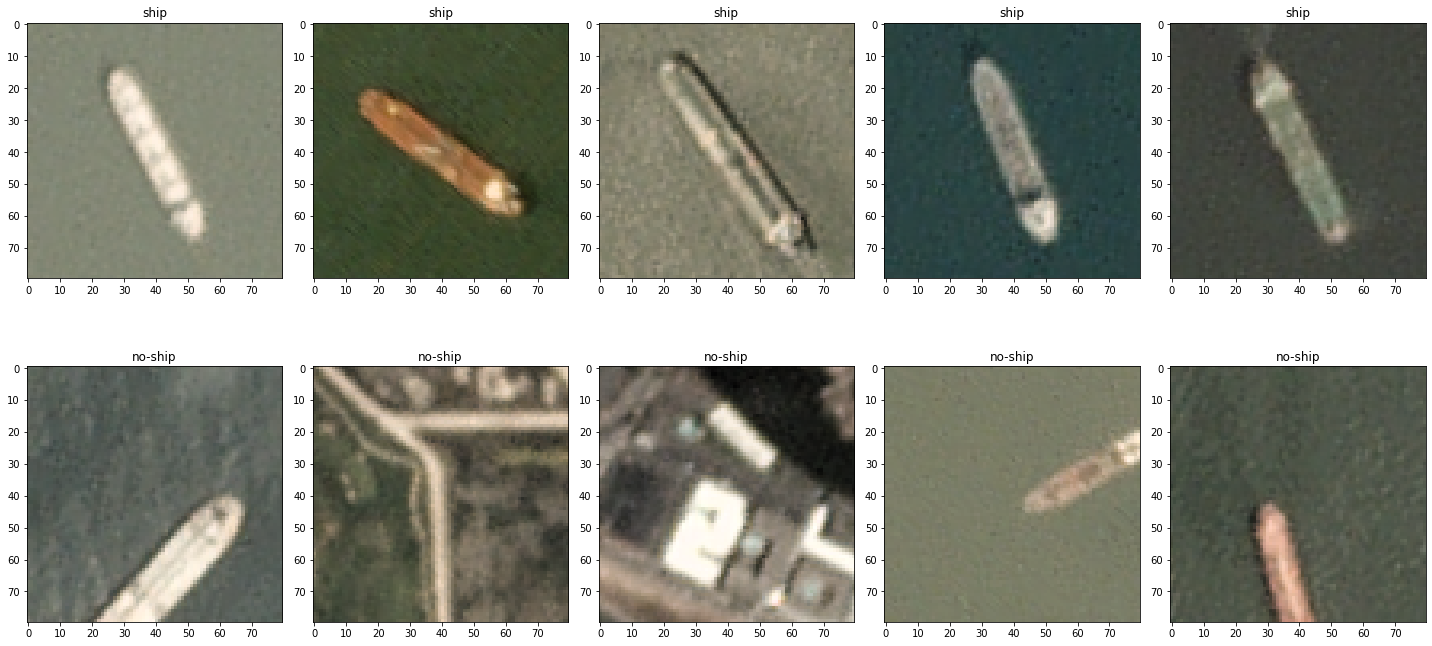

In [6]:
# Visualize the images in the dataset

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
count = 0
for i in os.listdir('./../input/satellite-imagery-of-ships'):
  # get the list of images in the particualr class
  train_class = os.listdir(os.path.join('../input/satellite-imagery-of-ships',i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('../input/satellite-imagery-of-ships',i,train_class[j])
    
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

In [7]:
no_ships=list()
class_name=list()
for i in os.listdir('./../input/satellite-imagery-of-ships'):
    train_class = os.listdir(os.path.join('../input/satellite-imagery-of-ships',i))
    no_ships.append(len(train_class))
    class_name.append(i)
    print(f"Number of images in {i}={len(train_class)}")

Number of images in ship=1000
Number of images in no-ship=3000


<function matplotlib.pyplot.show(close=None, block=None)>

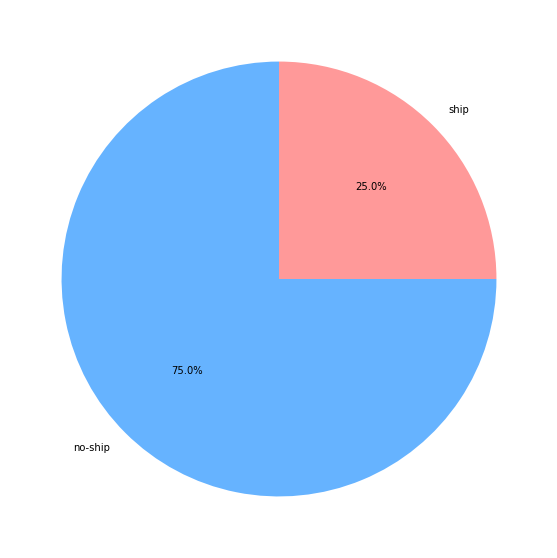

In [8]:
plt.figure(figsize=(15,10))
colors = ['#ff9999','#66b3ff']
plt.pie(no_ships, labels = class_name, autopct = '%1.1f%%',colors=colors)
plt.show

In [9]:
df1=pd.DataFrame(train,columns=["Images"])
df1


,Images
0,Data/ship/ship_000159.png
1,Data/ship/ship_000009.png
2,Data/ship/ship_000318.png
3,Data/ship/ship_000188.png
4,Data/ship/ship_000681.png
...,...
3995,Data/no-ship/no-ship_000810.png
3996,Data/no-ship/no-ship_000131.png
3997,Data/no-ship/no-ship_002061.png
3998,Data/no-ship/no-ship_000604.png


In [10]:
df2=pd.DataFrame(label,columns=["Labels"])
df2

,Labels
0,ship
1,ship
2,ship
3,ship
4,ship
...,...
3995,no-ship
3996,no-ship
3997,no-ship
3998,no-ship


In [11]:
df=pd.concat([df1,df2],axis=1)
df

,Images,Labels
0,Data/ship/ship_000159.png,ship
1,Data/ship/ship_000009.png,ship
2,Data/ship/ship_000318.png,ship
3,Data/ship/ship_000188.png,ship
4,Data/ship/ship_000681.png,ship
...,...,...
3995,Data/no-ship/no-ship_000810.png,no-ship
3996,Data/no-ship/no-ship_000131.png,no-ship
3997,Data/no-ship/no-ship_002061.png,no-ship
3998,Data/no-ship/no-ship_000604.png,no-ship


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df["Labels"]=le.fit_transform(df["Labels"])
df

,Images,Labels
0,Data/ship/ship_000159.png,1
1,Data/ship/ship_000009.png,1
2,Data/ship/ship_000318.png,1
3,Data/ship/ship_000188.png,1
4,Data/ship/ship_000681.png,1
...,...,...
3995,Data/no-ship/no-ship_000810.png,0
3996,Data/no-ship/no-ship_000131.png,0
3997,Data/no-ship/no-ship_002061.png,0
3998,Data/no-ship/no-ship_000604.png,0


In [14]:
df = shuffle(df)

train, test = train_test_split(df, test_size = 0.2)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 3560 to 2383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  3200 non-null   object
 1   Labels  3200 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.0+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 2523 to 3242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  800 non-null    object
 1   Labels  800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Images",
    y_col="Labels",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='validation',
    interpolation="nearest"
)



test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Images",
    y_col="Labels",
    weight_col=None,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset=None,
    interpolation="nearest"
)

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,

        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        '../input/satellite-imagery-of-ships',
        target_size=(256, 256),
        batch_size=32,color_mode="rgb",
        class_mode='categorical')

Found 4000 images belonging to 2 classes.


In [18]:
training_set[0]

(array([[[[0.4901961 , 0.48235297, 0.4039216 ],
          [0.4901961 , 0.48235297, 0.4039216 ],
          [0.49019524, 0.4823518 , 0.40391985],
          ...,
          [0.44706148, 0.45490405, 0.3725511 ],
          [0.44705886, 0.454902  , 0.37254903],
          [0.44705886, 0.454902  , 0.37254903]],
 
         [[0.4901961 , 0.48235297, 0.4039216 ],
          [0.4901961 , 0.48235297, 0.4039216 ],
          [0.49019524, 0.4823518 , 0.40391985],
          ...,
          [0.44706148, 0.45490405, 0.3725511 ],
          [0.44705886, 0.454902  , 0.37254903],
          [0.44705886, 0.454902  , 0.37254903]],
 
         [[0.4901961 , 0.48235297, 0.4039216 ],
          [0.4901961 , 0.48235297, 0.4039216 ],
          [0.49019524, 0.4823518 , 0.40391985],
          ...,
          [0.44868204, 0.45490426, 0.37363145],
          [0.44869205, 0.454902  , 0.37363786],
          [0.4487049 , 0.454902  , 0.37364638]],
 
         ...,
 
         [[0.4375953 , 0.442057  , 0.36416578],
          [0.43760

In [19]:
model= Sequential()

#Adding 1. Convolutional Layer

In [20]:
model.add(Conv2D(filters=96, input_shape=(256,256,3),kernel_size=(11,11),strides=(4,4), activation="relu"))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [22]:
#Adding 2. Convolutional Layer

In [23]:
model.add(Conv2D(filters=256,kernel_size=(3,3), strides=(2,2),activation="relu"))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Adding 3. Convolutional Layer

In [25]:
model.add(Conv2D(filters=256,kernel_size=(3,3), strides=(2,2),activation="relu"))

In [26]:
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# Passing it to a Fully Connected layer

In [27]:
model.add(Flatten())

Creating Fully Connected Layers

In [28]:
# 1st Fully Connected Layer
model.add(Dense(units=4000, activation="relu"))
# Add Dropout to prevent overfitting
model.add(Dropout(0.3))

In [29]:
# 2nd Fully Connected Layer
model.add(Dense(units=2000, activation="relu"))
model.add(Dropout(0.2))

In [30]:
# 3rd Fully Connected Layer
model.add(Dense(units=1000, activation="relu"))

In [31]:
# 4th Fully Connected Layer
model.add(Dense(units=500,activation="relu"))

In [32]:
# Add Final Dropout
model.add(Dropout(0.4))

In [33]:
# Output Layer
model.add(Dense(units=2, activation="softmax"))

In [34]:
model.summary() #Here we get a summary of our neural network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       221440    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [35]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
early_stopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=15)

In [37]:
# save the best model with lower validation loss
check_pointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [38]:
model.fit(x=training_set, epochs = 15, callbacks=[early_stopping])

Epoch 1/15
125/125 [==============================] - 111s 879ms/step - loss: 0.5321 - accuracy: 0.7622
Epoch 2/15
125/125 [==============================] - 102s 813ms/step - loss: 0.2373 - accuracy: 0.8910
Epoch 3/15
125/125 [==============================] - 102s 816ms/step - loss: 0.2068 - accuracy: 0.9211
Epoch 4/15
125/125 [==============================] - 103s 818ms/step - loss: 0.1979 - accuracy: 0.9296
Epoch 5/15
125/125 [==============================] - 102s 813ms/step - loss: 0.1562 - accuracy: 0.9429
Epoch 6/15
125/125 [==============================] - 102s 816ms/step - loss: 0.1301 - accuracy: 0.9548
Epoch 7/15
125/125 [==============================] - 102s 816ms/step - loss: 0.1325 - accuracy: 0.9503
Epoch 8/15
125/125 [==============================] - 102s 815ms/step - loss: 0.1121 - accuracy: 0.9603
Epoch 9/15
125/125 [==============================] - 102s 817ms/step - loss: 0.1169 - accuracy: 0.9571
Epoch 10/15
125/125 [==============================] - 102s 818m

In [39]:
pd.DataFrame(model.history.history)


,loss,accuracy
0,0.422347,0.81075
1,0.219074,0.90600
2,0.196463,0.92975
3,0.181830,0.93275
4,0.170854,0.93525
5,0.146495,0.94800
6,0.135617,0.95150
7,0.121055,0.95400
8,0.129556,0.94925
9,0.107983,0.96125


In [40]:
from tensorflow.keras.preprocessing import image

In [41]:
def predictor(location):
    test_image=image.load_img(location,target_size=(256,256))
    test_image=np.asarray(test_image, dtype= np.float32)
    test_image=test_image/255
    test_image= test_image.reshape(-1,256,256,3)
    result=model.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        
        prediction = "There is ship in the image"
    else:
        prediction = "There is NO ship in the image"
    print(result[0][0])
    return prediction



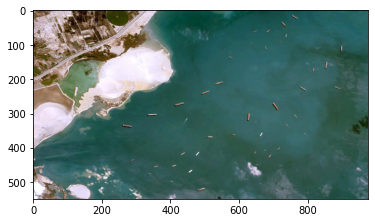

In [42]:
plt.imshow(plt.imread("../input/image1/imgae1.jpg"))
#There is ship in the image below

In [43]:
predictor("../input/image1/imgae1.jpg")
# Our model can truely detect the ship as in the picture above

1.0


'There is ship in the image'

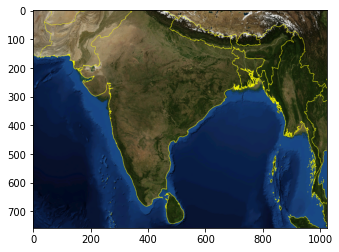

In [44]:
plt.imshow(plt.imread("../input/image7/image7.png"))
#There is no ship in this image

In [45]:
predictor("../input/image7/image7.png")
#And Our model predict correctly

0.99999976


'There is NO ship in the image'

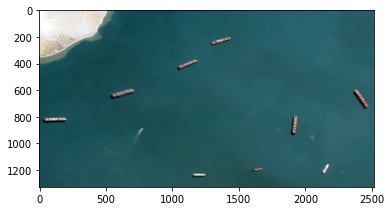

In [46]:
plt.imshow(plt.imread("../input/image2/image2.jpg"))
#There is ship in the image below

In [47]:
predictor("../input/image2/image2.jpg")
#And Our model predict correctly again

1.0


'There is ship in the image'

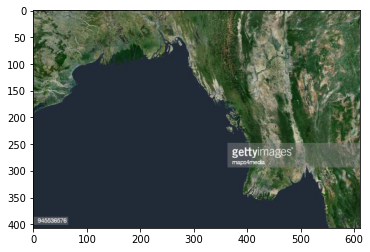

In [48]:
plt.imshow(plt.imread("../input/image6/image6.jpg"))
#There is no ship in this image

In [49]:
predictor("../input/image6/image6.jpg")
#And Our model predict correctly

1.0


'There is ship in the image'